In [1]:
##Implement Support Vector Machine for a dataset and compare the accuracy by applying
##the following kernel functions: i. Linear ii. Polynomial
##Dataset : bank_transactions_data_2.csv

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [3]:
data = pd.read_csv('bank_transactions_data_2.csv')

# Preprocess the data

In [4]:
data.head()
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


In [5]:
data.isnull().sum()

TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64

In [6]:
#no  null values
#label encding to be performed
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in data.columns:
    data[col]=le.fit_transform(data[col])

In [7]:
data.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,0,126,106,684,1,36,365,186,14,0,52,0,71,0,1306,105
1,1,450,1755,1192,1,15,50,82,51,0,50,0,131,0,2439,192
2,2,18,854,1276,1,23,229,343,8,2,1,3,46,0,452,41
3,3,68,1113,823,1,33,182,300,1,2,8,3,15,0,2024,163
4,4,406,98,1959,0,1,298,501,90,2,8,3,188,0,1820,16


<Axes: >

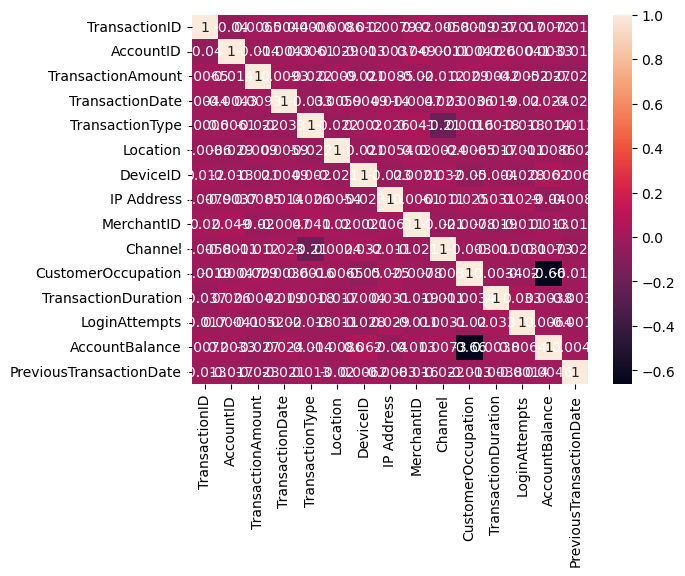

In [8]:
import seaborn as sns
x=data.drop(['CustomerAge'], axis=1)
sns.heatmap(x.corr(),annot=True)

In [9]:
#show good relations apply pca to form one big datacolumn instead of these all
from sklearn.decomposition import PCA
pca=PCA(n_components=15)
x_pca=pca.fit_transform(x)
y=data['CustomerAge']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=42)

In [ ]:
print('Linear Kernel SVM:')
linear_svm = SVC(kernel='linear')
linear_svm.fit(X_train, y_train)
linear_svm_acc = accuracy_score(y_test, linear_svm.predict(X_test))
print(f'Accuracy: {linear_svm_acc:.2f}')

Linear Kernel SVM:


In [ ]:
# Polynomial Kernel SVM
print('Polynomial Kernel SVM:')
poly_svm = SVC(kernel='poly', degree=3)
poly_svm.fit(X_train, y_train)
poly_svm_acc = accuracy_score(y_test, poly_svm.predict(X_test))
print(f'Accuracy: {poly_svm_acc:.2f}')